<a href="https://colab.research.google.com/github/HJoon-K/Find_Dust/blob/yang/dust_yjh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (17.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [1]:
import json

import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# 경고 메세지 감춤
import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
dust16 = pd.read_excel('data/기간별_일평균_대기환경_정보_2016년.xlsx')
dust16

In [ ]:
dust16.info()

In [ ]:
dust16.drop('권역명', axis=1, inplace=True)
dust16.drop('오존(ppm)', axis=1, inplace=True)
dust16.drop('이산화질소농도(ppm)', axis=1, inplace=True)
dust16.drop('일산화탄소농도(ppm)', axis=1, inplace=True)
dust16.drop('아황산가스농도(ppm)', axis=1, inplace=True)
dust16

In [ ]:
dust16.columns = ['date', 'gu', 'PM10', 'PM25']
dust16

In [ ]:
dust16.to_csv('data/dust2016.csv', index=False)

In [5]:
dust2016 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/dust2017.csv')
dust2016

date    gu  PM10  PM25
0     20170101    중구    81    64
1     20170101   용산구    77    73
2     20170101   종로구    82    67
3     20170101  서대문구    91    50
4     20170101   은평구    70    46
...        ...   ...   ...   ...
9120  20171231   금천구    63    38
9121  20171231   송파구    71    34
9122  20171231   강남구    54    38
9123  20171231   강동구    69    36
9124  20171231   서초구    75    39

[9125 rows x 4 columns]

In [ ]:
dust17 = pd.read_excel('data/기간별_일평균_대기환경_정보_2017년.xlsx')
dust17

In [ ]:
dust17.info()

In [ ]:
dust17.drop('권역명', axis=1, inplace=True)
dust17.drop('오존(ppm)', axis=1, inplace=True)
dust17.drop('이산화질소농도(ppm)', axis=1, inplace=True)
dust17.drop('일산화탄소농도(ppm)', axis=1, inplace=True)
dust17.drop('아황산가스농도(ppm)', axis=1, inplace=True)
dust17

In [ ]:
dust17.columns = ['date', 'gu', 'PM10', 'PM25']
dust17

In [ ]:
dust17.to_csv('data/dust2017.csv', index=False)

In [6]:
dust2017 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/dust2017.csv')
dust2017

date    gu  PM10  PM25
0     20170101    중구    81    64
1     20170101   용산구    77    73
2     20170101   종로구    82    67
3     20170101  서대문구    91    50
4     20170101   은평구    70    46
...        ...   ...   ...   ...
9120  20171231   금천구    63    38
9121  20171231   송파구    71    34
9122  20171231   강남구    54    38
9123  20171231   강동구    69    36
9124  20171231   서초구    75    39

[9125 rows x 4 columns]

In [ ]:
dust18 = pd.read_csv('data/기간별_일평균_대기환경_정보_2018년.csv', encoding='euc-kr')
dust18

In [ ]:
dust18.info()

In [ ]:
dust18.drop('권역코드', axis=1, inplace=True)
dust18.drop('권역명', axis=1, inplace=True)
dust18.drop('측정소코드', axis=1, inplace=True)
dust18.drop('오존(ppm)', axis=1, inplace=True)
dust18.drop('이산화질소농도(ppm)', axis=1, inplace=True)
dust18.drop('일산화탄소농도(ppm)', axis=1, inplace=True)
dust18.drop('아황산가스농도(ppm)', axis=1, inplace=True)
dust18

In [ ]:
dust18.columns = ['date', 'gu', 'PM10', 'PM25']
dust18

In [ ]:
dust18.to_csv('data/dust2018.csv', index=False)

In [7]:
dust2018 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/dust2018.csv')
dust2018

date    gu  PM10  PM25
0     20180101    중구    32    18
1     20180101   강동구    48    24
2     20180101   송파구    52    23
3     20180101   서초구    49    24
4     20180101   강남구    34    22
...        ...   ...   ...   ...
9095  20181231   구로구    46    23
9096  20181231  영등포구    48    33
9097  20181231   동작구    48    32
9098  20181231   관악구    48    31
9099  20181231   금천구    43    31

[9100 rows x 4 columns]

In [ ]:
dust19 = pd.read_csv('data/기간별_일평균_대기환경_정보_2019년.csv', encoding='euc-kr')
dust19

In [ ]:
dust19.info()

In [ ]:
dust19.drop('권역코드', axis=1, inplace=True)
dust19.drop('권역명', axis=1, inplace=True)
dust19.drop('측정소코드', axis=1, inplace=True)
dust19.drop('오존(ppm)', axis=1, inplace=True)
dust19.drop('이산화질소농도(ppm)', axis=1, inplace=True)
dust19.drop('일산화탄소농도(ppm)', axis=1, inplace=True)
dust19.drop('아황산가스농도(ppm)', axis=1, inplace=True)
dust19

In [ ]:
dust19.columns = ['date', 'gu', 'PM10', 'PM25']
dust19

In [ ]:
dust19.to_csv('data/dust2019.csv', index=False)

In [8]:
dust2019 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/dust2019.csv')
dust2019

date    gu  PM10  PM25
0     20190101    중구    38    26
1     20190101   강동구    43    32
2     20190101   송파구    44    28
3     20190101   서초구    37    20
4     20190101   강남구    37    31
...        ...   ...   ...   ...
8941  20191231   강서구    29    16
8942  20191231   구로구    20    14
8943  20191231  영등포구    22    14
8944  20191231   동작구    28    19
8945  20191231   관악구    26    14

[8946 rows x 4 columns]

In [9]:
dust = pd.concat([dust2016, dust2017, dust2018, dust2019])
dust.columns = ['측정일자', '측정소명', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']
dust.to_csv('/content/drive/MyDrive/Colab Notebooks/data/dust.csv', index=False)

In [10]:
dust = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/dust.csv')
dust

측정일자  측정소명  미세먼지(㎍/㎥)  초미세먼지(㎍/㎥)
0      20170101    중구         81          64
1      20170101   용산구         77          73
2      20170101   종로구         82          67
3      20170101  서대문구         91          50
4      20170101   은평구         70          46
...         ...   ...        ...         ...
36291  20191231   강서구         29          16
36292  20191231   구로구         20          14
36293  20191231  영등포구         22          14
36294  20191231   동작구         28          19
36295  20191231   관악구         26          14

[36296 rows x 4 columns]

In [ ]:
ra = pd.read_csv('data/도로현황(도로율).csv', header=1)
ra

In [ ]:
ra.info()

In [ ]:
ra.drop('자치구별(1)', axis=1, inplace=True)
ra.drop('도로연장 (km)', axis=1, inplace=True)
ra.columns = ['자치구별', '도로면적 (㎢)', '도로율 (%)']
ra.drop([0], axis=0, inplace=True)
ra

In [ ]:
ra.to_csv('data/road_area.csv', index=False)

In [11]:
road_area = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/road_area.csv')
road_area

자치구별  도로면적 (㎢)  도로율 (%)
0    종로구  2.701070    21.44
1     중구  1.876189    18.82
2    용산구  3.154983    22.19
3    성동구  3.024659    23.09
4    광진구  3.436834    28.83
5   동대문구  3.151074    22.16
6    중랑구  2.861614    26.01
7    성북구  4.225186    23.59
8    강북구  1.984564    20.93
9    도봉구  2.354393    19.02
10   노원구  3.703776    23.71
11   은평구  3.518076    22.08
12  서대문구  2.744932    17.25
13   마포구  4.113591    28.61
14   양천구  3.700304    27.88
15   강서구  4.971891    26.99
16   구로구  3.227759    22.06
17   금천구  2.263876    21.38
18  영등포구  4.574217    24.23
19   동작구  2.754623    17.29
20   관악구  3.028487    25.41
21   서초구  5.564352    26.35
22   강남구  5.803381    24.06
23   송파구  4.784694    20.68
24   강동구  3.378733    24.00

In [ ]:
p = pd.read_csv('data/서울시 주요 공원현황.csv', encoding='euc-kr')
p

In [ ]:
p.info()

In [ ]:
p.drop(['연번', '공원개요', '개원일', '주요시설',
        '주요식물', '안내도', '오시는길', '이용시참고사항',
        '이미지', '전화번호', '관리부서', 'X좌표(GRS80TM)', 'Y좌표(GRS80TM)', 'X좌표(WGS84)', 'Y좌표(WGS84)', '바로가기'], axis=1, inplace=True)
p

In [ ]:
p.columns = ['공원명', '면적 (㎡)', '지역', '공원주소']
p

In [ ]:
p.to_csv('data/park.csv', index=False)

In [12]:
park = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/park.csv')
park

공원명                                     면적 (㎡)   지역  \
0           남산도시자연공원  2896887 임 야 : 2454140 녹지대 및 기타시설 : 442747   중구   
1             길동생태공원                                      80683  강동구   
2              서울대공원                                    9132690  과천시   
3                서울숲                                     480994  성동구   
4              월드컵공원                                    2284085  마포구   
..               ...                                        ...  ...   
127  용마도시자연공원(사가정공원)                                    109635   중랑구   
128           문화비축기지                                     140022  마포구   
129            경춘선숲길                                     211392  NaN   
130             율현공원                                     157535  강남구   
131          서울로7017                                        NaN   중구   

                              공원주소  
0           서울특별시 중구 삼일대로 231(예장동)  
1     서울특별시 강동구 천호대로 1291(길동생태공원)   
2               경기도 과천시 대공원광장로 102  
3       서울특별시 성동구 뚝섬로 273 (성수동1가)   
4        서울특별시 마포구 하늘공원로 84(월드컵공원)  
..                             ...  
127            서울특별시 중랑구 면목7동 산50   
128               서울특별시 마포구 증산로 87  
129                노원구 공릉2동 산 82-2  
130  서울특별시 강남구 율현동 밤고개로24길(율현동 56)  
131                        서울로7017  

[132 rows x 4 columns]

In [ ]:
pop = pd.read_csv('data/인구밀도.csv', header=1)
pop.drop([0], axis=0, inplace=True)
print(pop)

In [ ]:
pop.drop(['동별(1)', '동별(3)'], axis=1, inplace=True)
pop.columns = ['구별', '인구 (명)', '면적 (㎢)', '인구밀도 (명/㎢)']
pop

In [ ]:
pop.to_csv('data/population.csv', index=False)

In [13]:
population = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/population.csv')
population

구별  인구 (명)  면적 (㎢)  인구밀도 (명/㎢)
0    종로구  153789   23.91        6431
1     중구  131787    9.96       13231
2    용산구  237285   21.87       10852
3    성동구  292672   16.86       17359
4    광진구  352627   17.06       20666
5   동대문구  352006   14.22       24762
6    중랑구  391885   18.50       21188
7    성북구  440142   24.58       17909
8    강북구  302563   23.60       12820
9    도봉구  319373   20.65       15465
10   노원구  514946   35.44       14530
11   은평구  477173   29.71       16061
12  서대문구  315659   17.63       17908
13   마포구  378686   23.85       15878
14   양천구  450487   17.41       25882
15   강서구  579768   41.45       13986
16   구로구  421163   20.12       20933
17   금천구  244891   13.02       18808
18  영등포구  400908   24.55       16331
19   동작구  394364   16.36       24113
20   관악구  499449   29.57       16891
21   서초구  416167   46.98        8858
22   강남구  537800   39.50       13616
23   송파구  663965   33.88       19599
24   강동구  466472   24.59         189

In [14]:
pcount = park.groupby(['지역'])['공원명'].count()

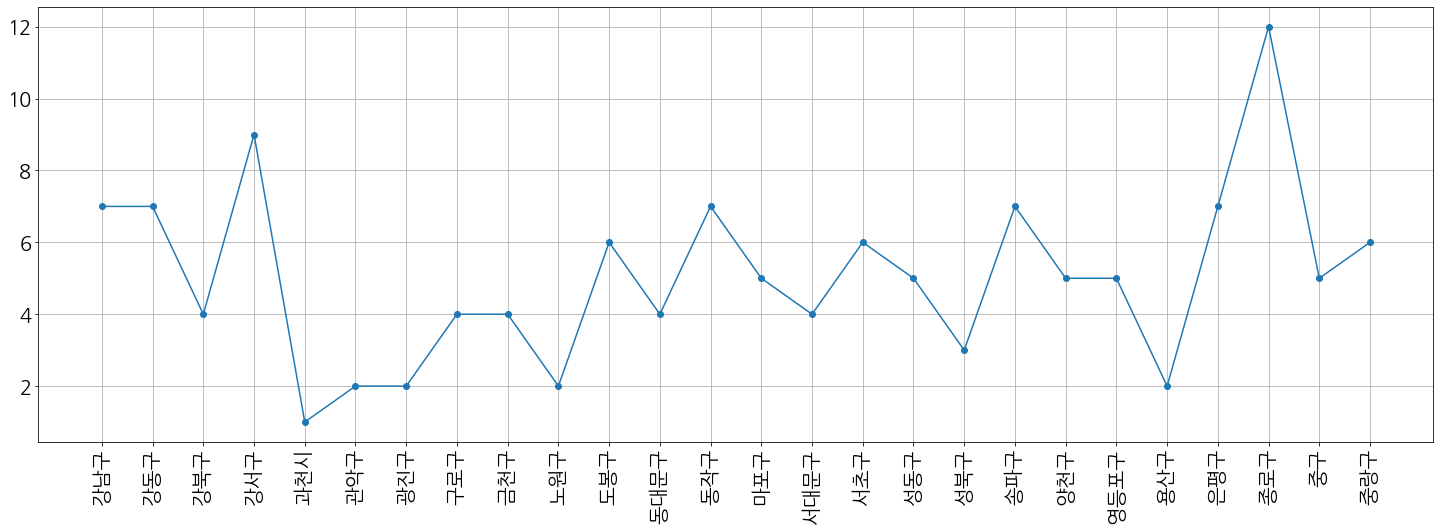

In [15]:
# 지역별 공원 수
plt.figure(figsize=(25, 8))
plt.plot(pcount, 'o-')
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.show()

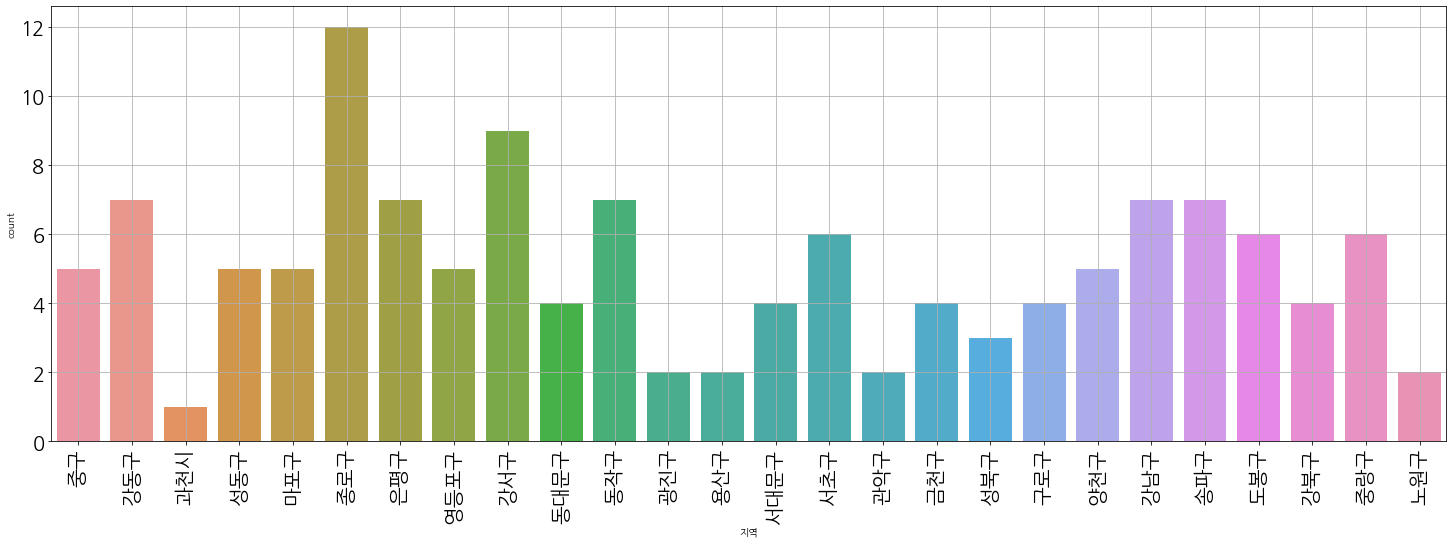

In [16]:
# 지역별 공원 수
# 막대 그래프
plt.figure(figsize=(25, 8))
sns.countplot(x=park['지역'])
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.show()

In [17]:
gpmean = dust.groupby(['측정소명'])['미세먼지(㎍/㎥)'].mean()

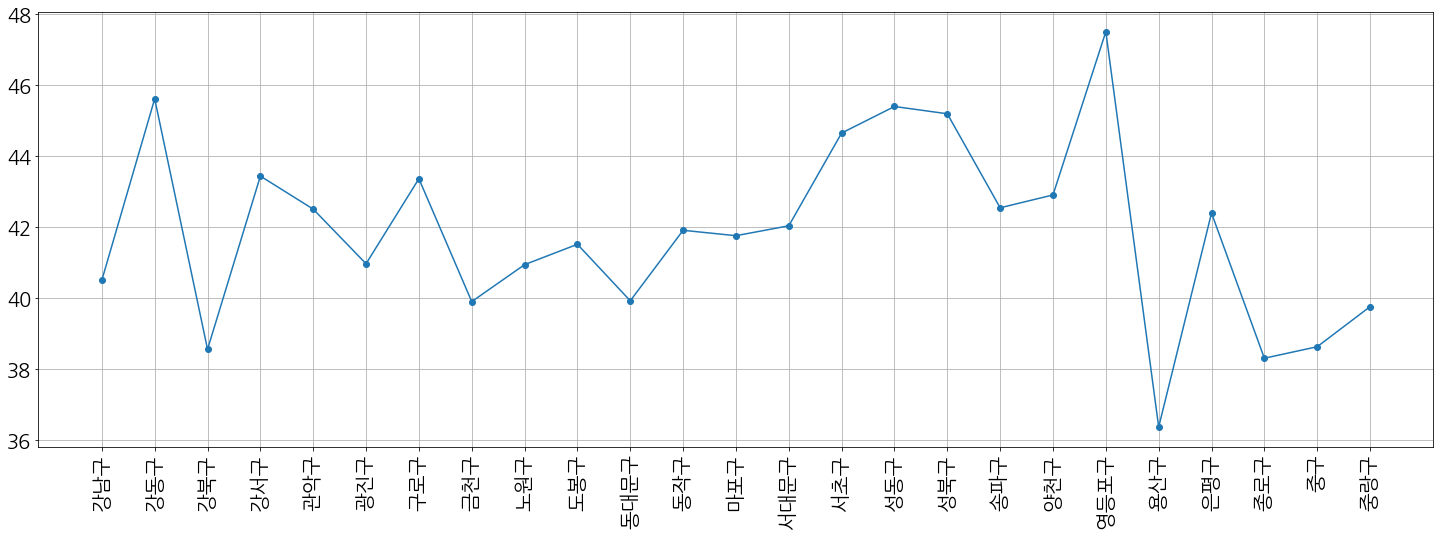

In [18]:
# 구별 미세먼지 평균
plt.figure(figsize=(25, 8))
plt.plot(gpmean, 'o-')
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.show()

In [19]:
gpmean2 = dust.groupby(['측정소명'])['초미세먼지(㎍/㎥)'].mean()

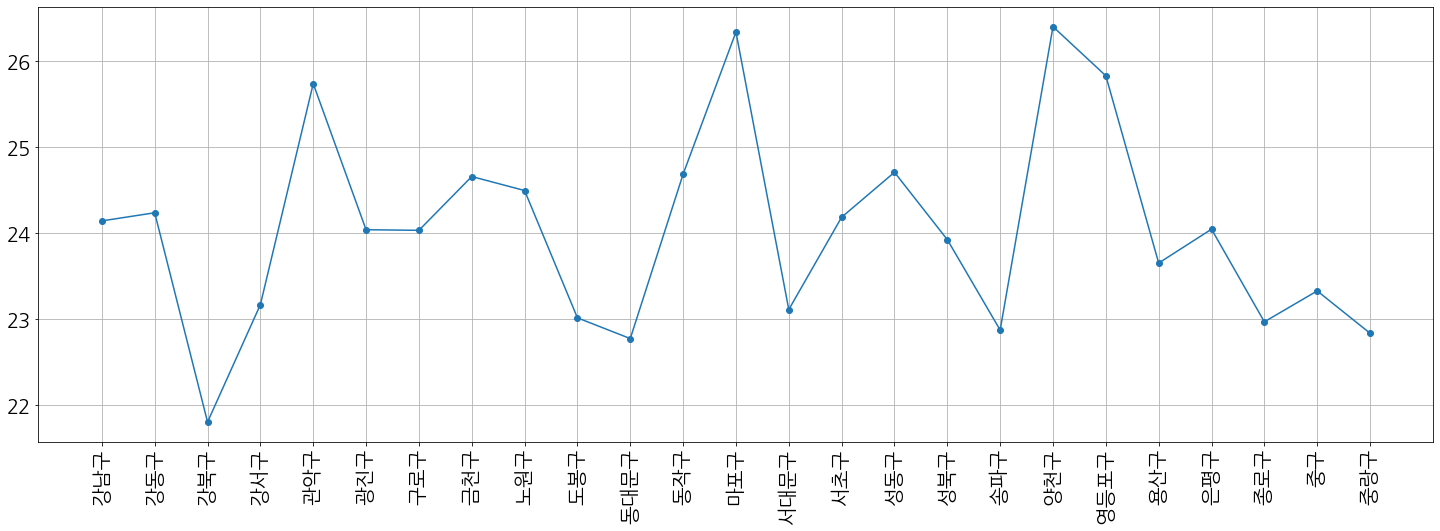

In [20]:
# 구별 초미세먼지 평균
plt.figure(figsize=(25, 8))
plt.plot(gpmean2, 'o-')
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.show()

In [21]:
gpmax = dust.groupby(['측정소명'])['미세먼지(㎍/㎥)'].max()

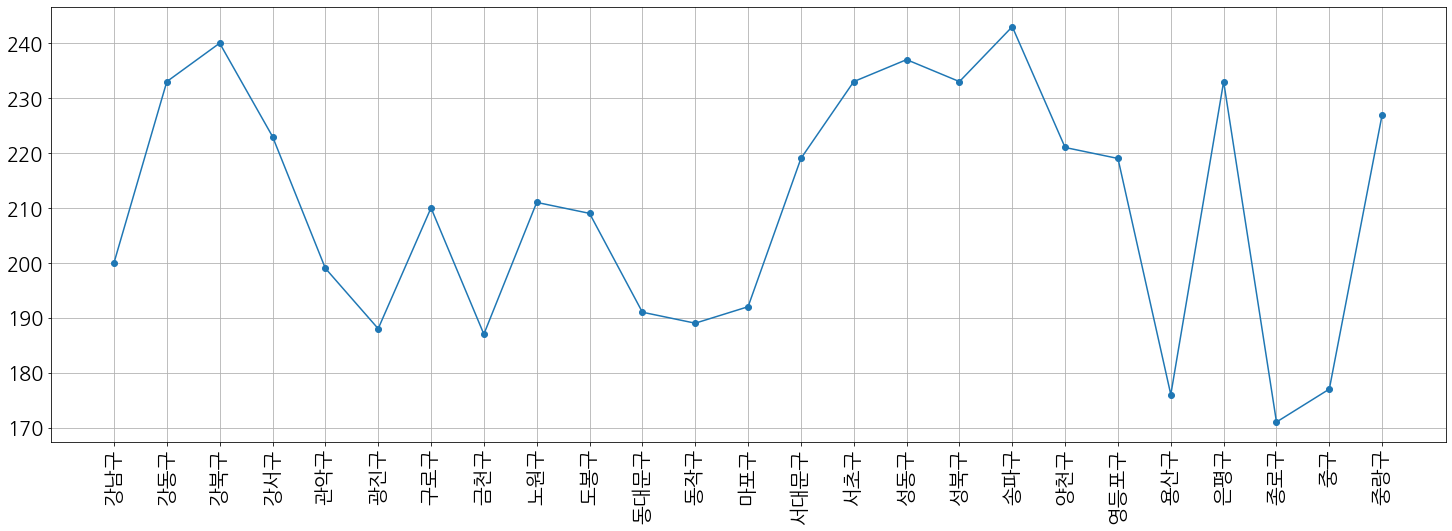

In [22]:
# 구별 미세먼지 최대치
plt.figure(figsize=(25, 8))
plt.plot(gpmax, 'o-')
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.show()

In [23]:
gpmin = dust.groupby(['측정소명'])['미세먼지(㎍/㎥)'].min()

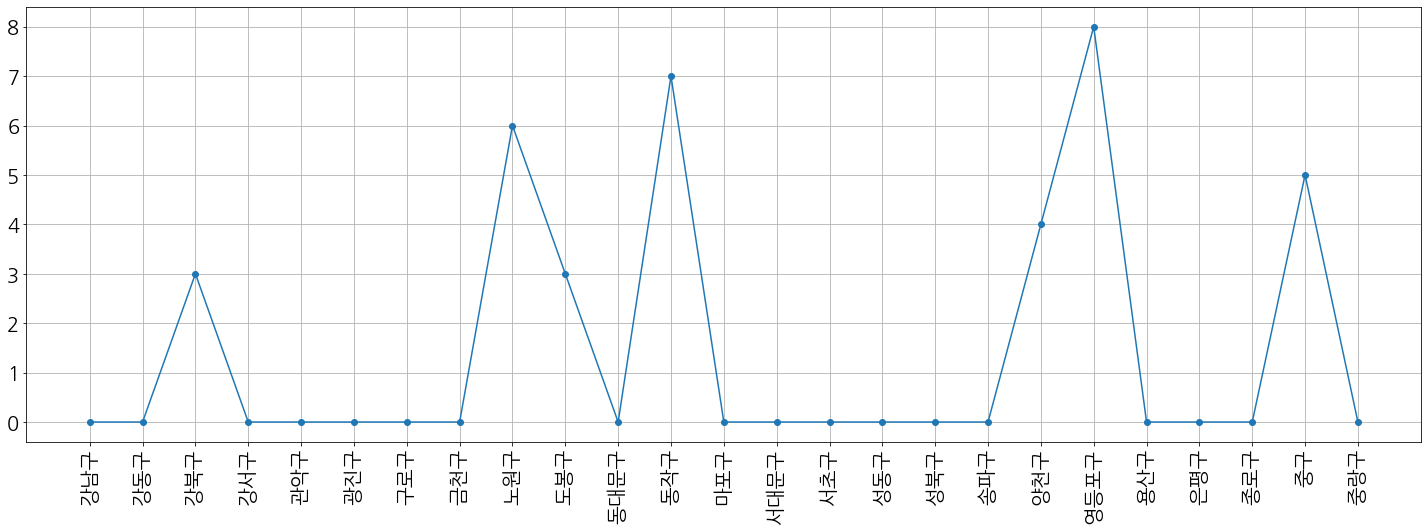

In [24]:
# 구별 미세먼지 최소치
plt.figure(figsize=(25, 8))
plt.plot(gpmin, 'o-')
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.show()

In [25]:
gpmax2 = dust.groupby(['측정소명'])['초미세먼지(㎍/㎥)'].max()

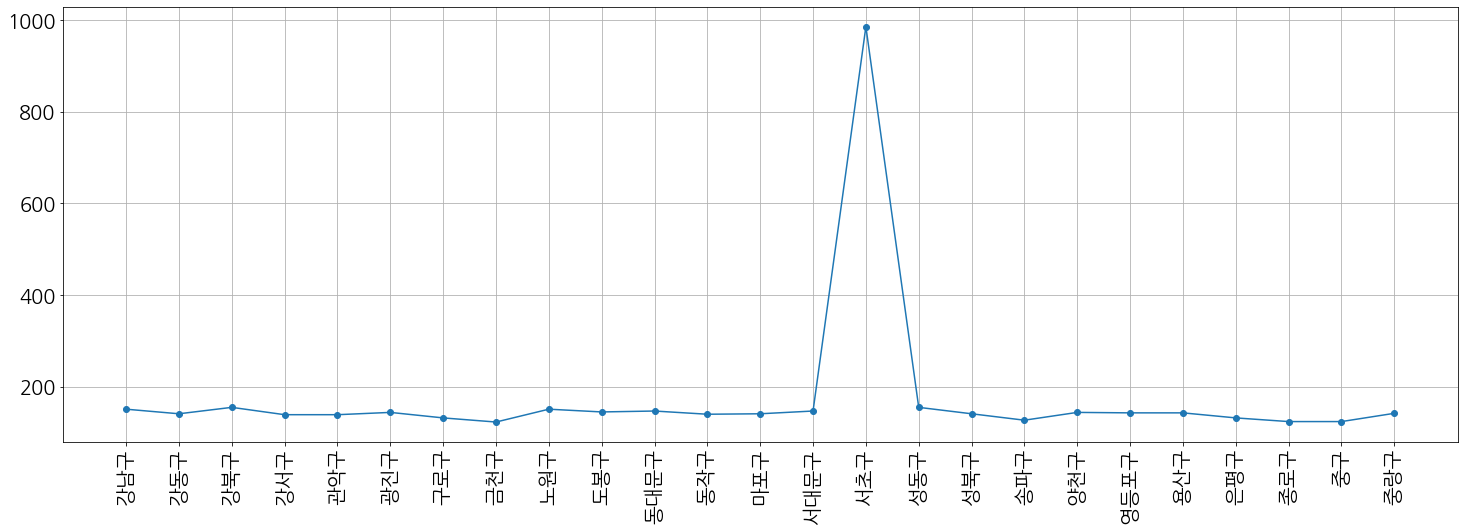

In [26]:
# 구별 초미세먼지 최대치
plt.figure(figsize=(25, 8))
plt.plot(gpmax2, 'o-')
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.show()

In [27]:
gpmin2 = dust.groupby(['측정소명'])['초미세먼지(㎍/㎥)'].min()

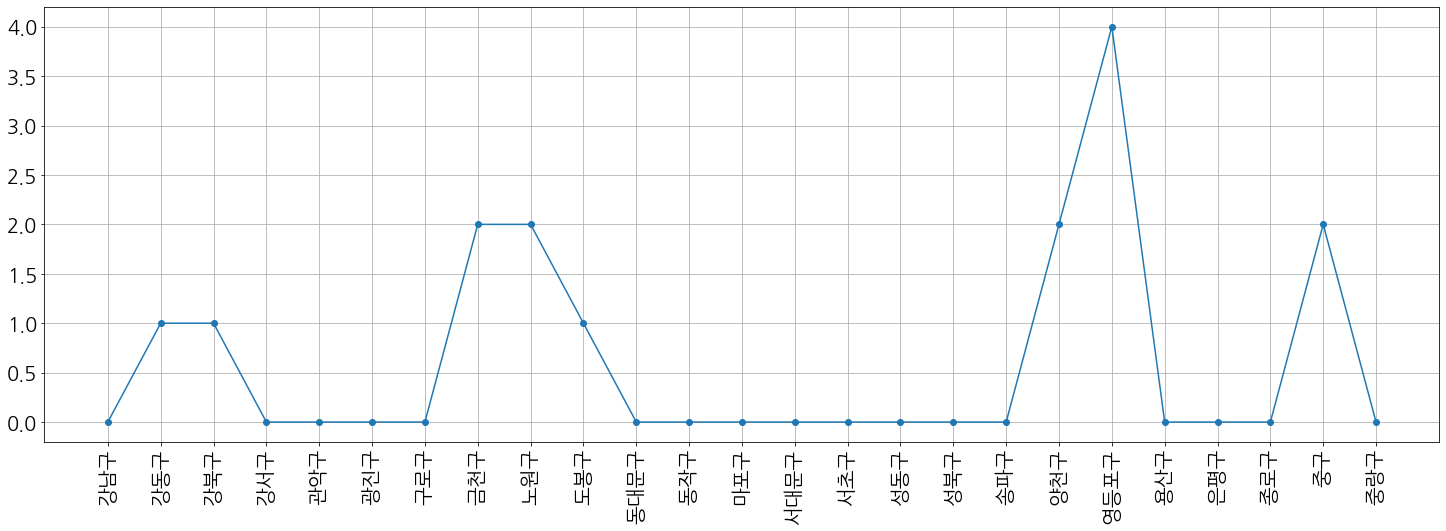

In [28]:
# 구별 초미세먼지 최소치
plt.figure(figsize=(25, 8))
plt.plot(gpmin2, 'o-')
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.show()

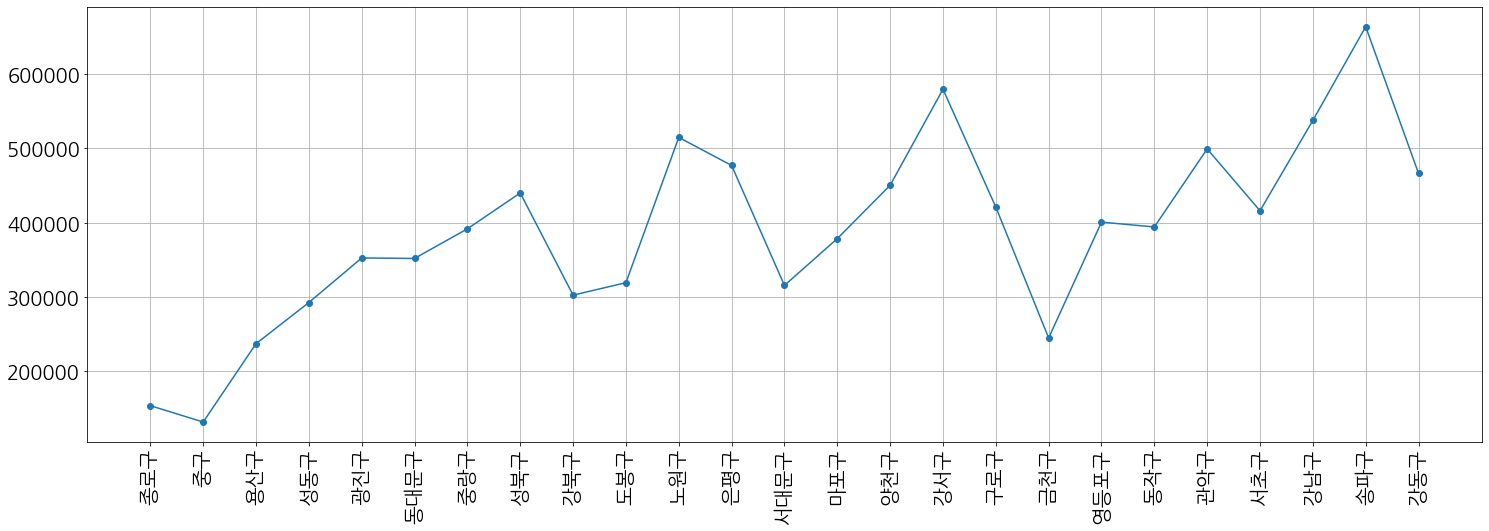

In [29]:
# 구별 인구수
plt.figure(figsize=(25, 8))
plt.plot(population['구별'], population['인구 (명)'], 'o-')
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.show()

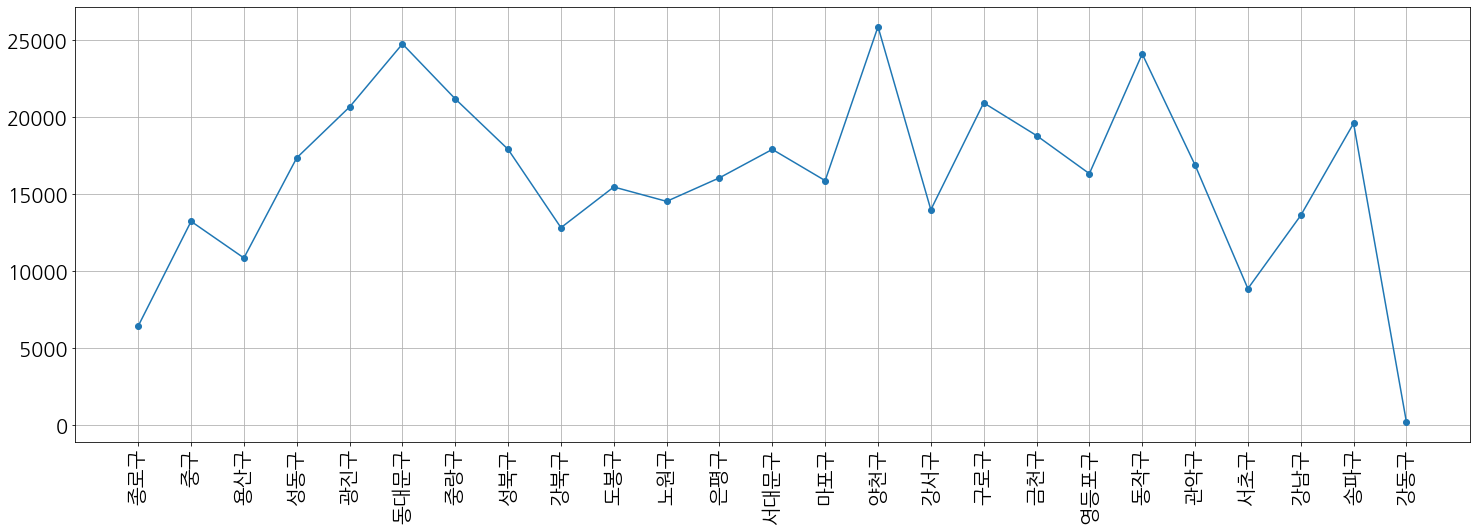

In [30]:
# 구별 인구 밀도
plt.figure(figsize=(25, 8))
plt.plot(population['구별'], population['인구밀도 (명/㎢)'], 'o-')
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.show()

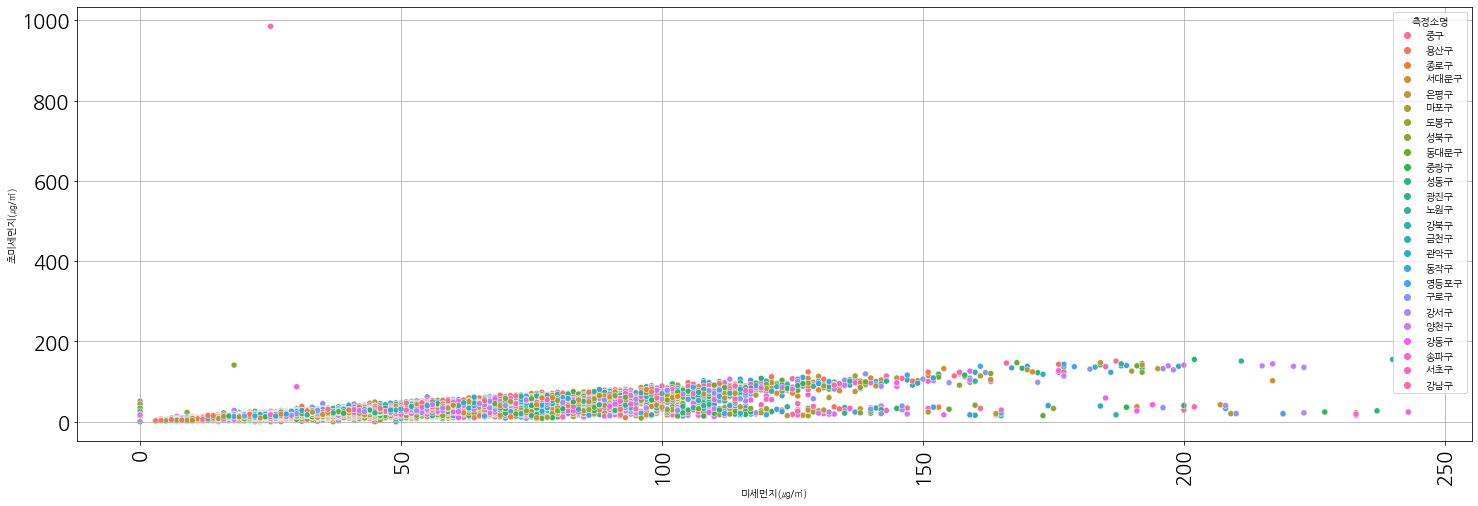

In [31]:
# 구별 미세먼지, 초미세먼지 산점도
plt.figure(figsize=(25, 8))
sns.scatterplot(data=dust, x='미세먼지(㎍/㎥)', y='초미세먼지(㎍/㎥)', hue='측정소명')
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.show()

In [32]:
# 데이터 적재
pop = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/population.csv')
dust = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/dust.csv')
road_area = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/road_area.csv')
park = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/park.csv')
seoul_geo = '/content/drive/MyDrive/Colab Notebooks/data/seoul_gu.json'

In [33]:
# 지도 표현
# 서울특별시 구별 인구수
seoul = [37.60, 126.97]
fmap = folium.Map(seoul, zoom_start=11)

folium.Choropleth(geo_data=seoul_geo, data=pop, columns=['구별', '인구 (명)'],
                  key_on='feature.properties.SGG_NM', fill_color='YlOrBr',
                  fill_opacity=0.6, legend_name='서울특별시 구별 인구수').add_to(fmap)
fmap.save('/content/drive/MyDrive/Colab Notebooks/map/pop_map.html')
fmap

In [34]:
# 서울특별시 구별 인구 밀도
fmap = folium.Map(seoul, zoom_start=11)

folium.Choropleth(geo_data=seoul_geo, data=pop, columns=['구별', '인구밀도 (명/㎢)'],
                  key_on='feature.properties.SGG_NM', fill_color='YlOrBr',
                  fill_opacity=0.6, legend_name='서울특별시 구별 인구 밀도').add_to(fmap)
fmap.save('/content/drive/MyDrive/Colab Notebooks/map/den_map.html')
fmap

In [35]:
# 서울특별시 구별 도로 면적
fmap = folium.Map(seoul, zoom_start=11)

folium.Choropleth(geo_data=seoul_geo, data=road_area, columns=['자치구별', '도로면적 (㎢)'],
                  key_on='feature.properties.SGG_NM', fill_color='YlOrBr',
                  fill_opacity=0.6, legend_name='서울특별시 구별 도로 면적').add_to(fmap)
fmap.save('/content/drive/MyDrive/Colab Notebooks/map/road_area_map.html')
fmap

In [36]:
# 서울특별시 구별 도로율
fmap = folium.Map(seoul, zoom_start=11)

folium.Choropleth(geo_data=seoul_geo, data=road_area, columns=['자치구별', '도로율 (%)'],
                  key_on='feature.properties.SGG_NM', fill_color='YlOrBr',
                  fill_opacity=0.6, legend_name='서울특별시 구별 도로율').add_to(fmap)
fmap.save('/content/drive/MyDrive/Colab Notebooks/map/road_rate_map.html')
fmap

In [37]:
# 서울특별시 구별 면적
fmap = folium.Map(seoul, zoom_start=11)

folium.Choropleth(geo_data=seoul_geo, data=pop, columns=['구별', '면적 (㎢)'],
                  key_on='feature.properties.SGG_NM', fill_color='YlOrBr',
                  fill_opacity=0.6, legend_name='서울특별시 구별 면적').add_to(fmap)
fmap.save('/content/drive/MyDrive/Colab Notebooks/map/area_map.html')
fmap